#Project #2 Starter Code

Your project should address the categories below.

##How many points I think I Attempted:
*I attempted every point on this project. I made sure to elaborate as much as I could for my written portions, and included all the requirements for the coding portions.*

##Problem: 
*In this machine learning experiment, I am trying to determine whether or not someone favored a movie based on the review they gave of it. This could be useful for film studios that want to take a closer look at the reviews than just at the number rating. This data has one predictor variable, the review itself, and one target variable, the sentiment. I am trying to predict the sentiment of a review given the text of it.*
#Input Pipeline(sklearn):

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/IMDB_dataset.csv')
data.head()

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Data Exploration#


*   Number of samples
*   Number of classes of the target variable
*   Number of words per sample
*   Distribution of sample length
*   Something else: get creative :)



Number of Samples: 50000
Classes of the Target Variable: ['positive' 'negative']
The median wordcount is: 173
The average number of characters in a positive review is: 1324.79768
The average number of characters in a negative review is: 1294.06436


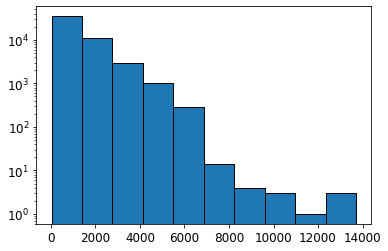

In [ ]:
# Number of Samples
print('Number of Samples:', data.shape[0])

# Number of classes of the target variable
print('Classes of the Target Variable:', data['sentiment'].unique())

# Median number of words in the reviews
## Get the number of words per review
num_words = []
for review in data['review']:
  words_in_review = len(review.strip().split(" ")) #strip() removes extra characters, split divides the string by the spaces into a list
  num_words.append(words_in_review)
## Calculate the median number of words
num_words.sort()
middle = round(len(num_words)/2)
if len(num_words) % 2 != 0:
  median = (num_words[middle] + num_words[middle-1])/2
else:
  median = num_words[(middle)]

print('The median wordcount is:', median)

# Distribution of sample length
import matplotlib.pyplot as plt
%matplotlib inline

row_length = []
for text in data['review']:
  row_length.append(len(text))
plt.hist(row_length, log = True, edgecolor='black') #Code sourced from https://datagy.io/histogram-python/

# Something else - What is the average length of positive versus negative sentiment reviews?
positive_length = 0
negative_length = 0
positive_count = 0
negative_count = 0

for index, sample in data.iterrows(): # I wasn't sure why this wasn't working, and from stackoverflow adding index to the for loop fixed it
                                      # Link to the page: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
  if sample['sentiment'] == 'positive':
    positive_length += len(sample['review'])
    positive_count += 1
  else:
    negative_length += len(sample['review'])
    negative_count += 1

print('The average number of characters in a positive review is:', (positive_length/positive_count))
print('The average number of characters in a negative review is:', (negative_length/negative_count))

#Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here.

*This cell firstly runs the imports needed to prep the data, including downloading stopwords from NLTK.*


In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


*This function is used to run on each review in the dataframe and sets it all to lowercase and without stop words, the most common words that do not add much to the review.*

In [ ]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

*Using the clean_review function to create a list of the cleaned up reviews*

In [ ]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))

In [ ]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

*Dividing up the data into training and testing datasets, as we've done before*

In [ ]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0)

##Vectorizing the data
**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words - 5000 will take a while, minimum should be about 500
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.

#Metrics:
*For SVC, I'll be using accuracy as well as a confusion matrix, and Dr. Manley's function for plotting the decision boundary graph*

*For PCA, I'll be using accuracy and a graph. As PCA transforms the data, it would be best to use a graphical representation to see the changes running it made on the accuracy.*

*With a single perceptron, I'll be using accuracy, a confusion matrix, and a chart of accuracy vs. epochs. This is the best for this type of machine learning because as it is a classification problem, epochs and training rate are the only two ways to tune it.*

*For MLP, I will be using accuracy, a confusion matrix, and a similar graph to the perceptron.*

#SVC:
*For this model, I'll be tuning the C value and gamma*

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics 
# Support Vector Classifier
clf = SVC(C = 0.5, gamma = 'scale') # A lower C-value will make the decision boundary more smooth, which will be more applicable to a testing set
clf.fit(train_data_vectors,train_sln)
clf_predictions = clf.predict(test_data_vectors)

# Accuracy and Confusion Matrix
print("accuracy:", metrics.accuracy_score(test_sln, clf_predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, clf_predictions, labels = vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


accuracy: 0.827
            Pred positive  Pred negative
T positive           4210            755
T negative            975           4060


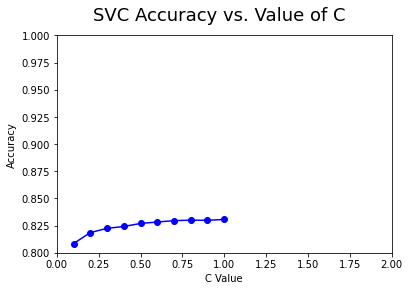

The most accurate C value was 0.8307


In [ ]:
# Graphing the results - SVC accuracy vs C-value
#range_c = range(0, 1, 0.1)
range_c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
c_accuracies = []

for c in range_c:
  curr_c = SVC(C = c, gamma = 'scale')
  curr_c.fit(train_data_vectors, train_sln)
  curr_predictions = curr_c.predict(test_data_vectors)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  c_accuracies.append(curr_accuracy)

# Creating the Graph
plt.suptitle('SVC Accuracy vs. Value of C',fontsize = 18)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(range_c, c_accuracies,'bo-')
plt.axis([0,range_c[-1]+1,.8,1])
plt.show()

print('The most accurate C value was', max(c_accuracies))

#PCA:
*For this model, I'll be tuning the parameter Whiten. As PCA transforms the data and does not make predictions on its own, I will be running another SVC to see how the data was transformed.*

In [ ]:
from sklearn.decomposition import PCA
from sklearn import metrics
# Principal Component Analysis
extractor = PCA(whiten = True)
# Transform training and testing data
extractor.fit(train_data_vectors)
train_data_transformed = extractor.transform(train_data_vectors)
test_data_transformed = extractor.transform(test_data_vectors)

In [ ]:
# Run a new SVC to compare to the previous run
clf_pca = SVC(C = 0.5, gamma = 'scale')
clf_pca.fit(train_data_transformed,train_sln)
clf_pca_predictions = clf_pca.predict(test_data_transformed)

# Accuracy and Confusion Matrix
print("accuracy:", metrics.accuracy_score(test_sln, clf_pca_predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, clf_pca_predictions, labels = vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.8315
            Pred positive  Pred negative
T positive           4252            713
T negative            972           4063


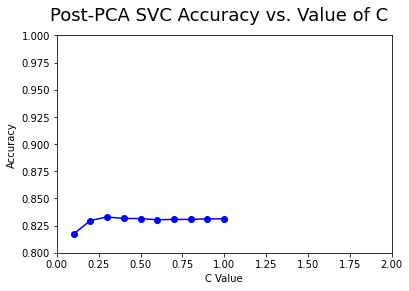

The most accurate C value was 0.8329


In [ ]:
# Graphing the results - SVC accuracy vs C-value
range_c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
c_accuracies = []

for c in range_c:
  curr_c = SVC(C = c, gamma = 'scale')
  curr_c.fit(train_data_transformed, train_sln)
  curr_predictions = curr_c.predict(test_data_transformed)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  c_accuracies.append(curr_accuracy)

# Creating the Graph
plt.suptitle('Post-PCA SVC Accuracy vs. Value of C',fontsize = 18)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(range_c, c_accuracies,'bo-')
plt.axis([0,range_c[-1]+1,.8,1])
plt.show()

print('The most accurate C value was', max(c_accuracies))

#Perceptron:
*For this model, I'll be tuning the number of epochs. Since it is a classification problem, it has no activation function to tune.*

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn import metrics
# Perceptron
perc = Perceptron(eta0 = 0.1, max_iter = 100)
perc.fit(train_data_vectors,train_sln)
perc_predictions = perc.predict(test_data_vectors)

# Accuracy and Confusion Matrix
print("accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, perc_predictions, labels = vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.809
            Pred positive  Pred negative
T positive           4225            740
T negative           1170           3865


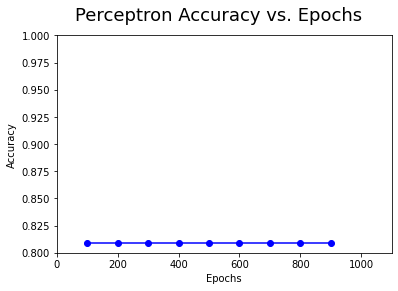

The most accurate epoch was: 0.809


In [ ]:
# Graphing the results - Perceptron Accuracy vs Epochs
range_epochs = range(100, 1000, 100)
perc_accuracies = []

for e in range_epochs:
  curr_e = Perceptron(eta0 = 0.1, max_iter = e)
  curr_e.fit(train_data_vectors, train_sln)
  curr_predictions = curr_e.predict(test_data_vectors)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  perc_accuracies.append(curr_accuracy)

# Creating the Graph
plt.suptitle('Perceptron Accuracy vs. Epochs',fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range_epochs, perc_accuracies,'bo-')
plt.axis([0,1100,.8,1])
plt.show()

print('The most accurate epoch was:', max(perc_accuracies))

#Multi Layer Perceptron:
*For MLP, I'll be tuning the number of epochs, as tuning the width or depth could be very computationally intensive*

In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
mlp = MLPClassifier(learning_rate = 'adaptive', max_iter = 100)
mlp.fit(train_data_vectors,train_sln)
mlp_predictions = mlp.predict(test_data_vectors)

# Accuracy and Confusion Matrix
print("accuracy:", metrics.accuracy_score(test_sln, mlp_predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, mlp_predictions, labels = vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.8065
            Pred positive  Pred negative
T positive           4038            927
T negative           1008           4027


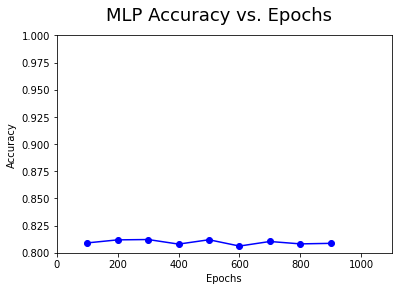

The most accurate epoch was: 0.8122


In [ ]:
# Graphing the results - MLP Accuracy vs Epochs
range_epochs = range(100, 1000, 100)
mlp_accuracies = []

for e in range_epochs:
  curr_e = MLPClassifier(learning_rate = 'adaptive', max_iter = e)
  curr_e.fit(train_data_vectors, train_sln)
  curr_predictions = curr_e.predict(test_data_vectors)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  mlp_accuracies.append(curr_accuracy)

# Creating the Graph
plt.suptitle('MLP Accuracy vs. Epochs',fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range_epochs, mlp_accuracies,'bo-')
plt.axis([0,1100,.8,1])
plt.show()

print('The most accurate epoch was:', max(mlp_accuracies))

#Bumps in the Road:
*The biggest challenge I encountered was definitely how long the code took to run. Because the dataset was so large, I wasn't able to tune the parameters as well as I might have wanted. To overcome this, I lowered the max_features parameter in the CountVectorizer to 500 rather than 5000. Although it may have led to results that I may not have wanted ideally, they were able to be achieved in a much more reasonable amount of time.*

#Results:
*To summarize the results I achieved, the confusion matrices generated for each machine learning model can help explain what happened. The first model, the Support Vector Classifier, had an accuracy of 82.7%. The number of false negatives and positives was relatively similar, but it was able to predict the sentiment of reviews fairly accurately.*

*The second model was the Principal Component Analysis, or PCA. As PCA doesn't make predictions on its own, I used it to create a modified version of the data to run on another model. I decided to run another SVC so that it can be easily compared with the original. I found that it had an accuracy of 83.15%, which was only marginally better than the original SVC model.*

*The third model ran was the Perceptron. It had a similar accuracy of roughly 80%, but it had many more false positives than false negatives. In this case, it meant that it predicted reviews were positive more often than they actually were.*

*The last model ran was the MLP, multi-layer perceptron. This resulted in an accuracy of roughly 81.22%, only slightly better than the regular perceptron.*

#Conclusions:
*In conclusion, I found that the most accurate model to predict the sentiment of a movie review was using a Support Vector Classifier after running a Principal Component Analysis. I think this was the most accurate because of the PCA transforming the data, rather than leaving it as just the vectorization. Changing gamma to help the model generalize better helped as well. One thing I thought was interesting was how the number of epochs didn't seem to really influence how accurate the perceptron or MLP were. Going into this experiment, I thought those two would be by far the most accurate, but they were the least accurate models. If I had to run this experiment again, I would increase the number of max features when vectorizing. I had to sacrifice having that value be higher in exchange for a faster runtime, but I think that if it was higher I would have had better results.*